# 1. Sampling from a known distribution
### Write a program that generates a dataset from the lognormal distribution

The sampling method used in the following examples is the CDF inversion method wherein the CDF is computed by numerical integration and then inverted. Finally, samples are drawn by randomly sampling the inverted CDF using a uniform distribution. 

Computed log-mean: 0.97981547004
Computed log-variance: 1.0126772172


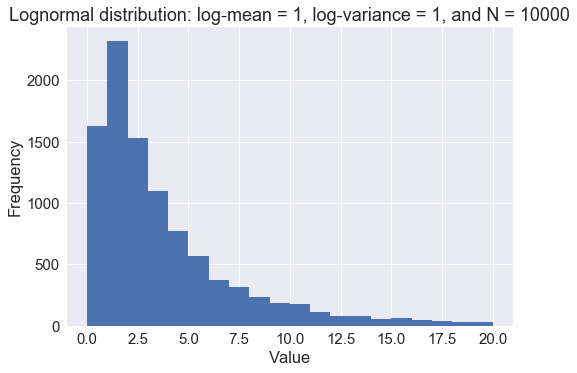

In [2]:
from __future__ import division
import numpy as np
import scipy.interpolate as interpolate
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True); sns.set(font_scale=1.5)
import sys

MU = 1
VARIANCE = 1
SIZE = 10000

def cdf_lognorm(mu, sigma, loc):
    """ Returns the cumulative probability of a lognormal distribution at a location"""
    return integrate.quad(lambda x: (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) \
                                     / (x * sigma * np.sqrt(2 * np.pi))), 0, loc)[0]

def cdf_inverse_sampling_lognormal(mu, variance, size):
    """ Returns a dataset sampled from the lognormal distribution using CDF inversion """
    sigma = np.sqrt(variance)
    X = np.logspace(np.spacing(1), 3, num=500) - 1 # The bounds on X
    cdf = [cdf_lognorm(mu, sigma, x) for x in X]
    cdf_inv = interpolate.interp1d(cdf, X, bounds_error=False)
    U = np.random.uniform(min(cdf), max(cdf), size=size)
    return cdf_inv(U)

d = cdf_inverse_sampling_lognormal(MU, VARIANCE, SIZE)
print "Computed log-mean: " + str(np.mean(np.log(d)))
print "Computed log-variance: " + str(np.var(np.log(d)))

plt.figure()
plt.hist(d, bins=20, range=[0, 20])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Lognormal distribution: log-mean = ' + str(MU) + ', log-variance = ' \
          + str(VARIANCE) + ', and N = ' + str(SIZE))
plt.show()


### Write a program that generates a dataset from the log-hyperbolic distribution

Computed log-mean: 1.0025651223


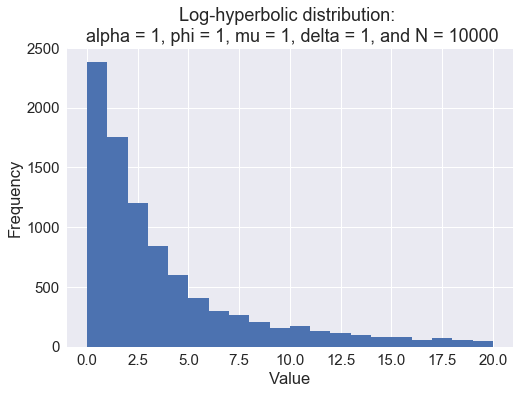

In [4]:
import scipy.special as special

ALPHA = 1
PHI = 1
MU = 1
DELTA = 1
SIZE = 10000

def cdf_loghyperbolic(phi, alpha, delta, mu, loc):
    """ Returns the cumulative probability of a log-hyperbolic distribution at a location"""
    return integrate.quad(lambda x: (np.exp(-.5 * (phi + alpha) \
                    * np.sqrt(delta**2 + (np.log(x) - mu)**2) + 0.5 \
                    * (phi - alpha) * (np.log(x) - mu)) / ((1/phi + 1/alpha) \
                    * delta * np.sqrt(phi * alpha) * x \
                    * special.yn(1, delta * np.sqrt(phi * alpha)))), 0, loc)[0]

def cdf_inverse_sampling_loghyperbolic(alpha, phi, delta, mu, size):
    """ Returns a dataset sampled from the log-hyperbolic distribution using CDF inversion """
    X = np.logspace(np.spacing(1), 3, num=500) - 1 # The bounds on X
    cdf = [cdf_loghyperbolic(phi, alpha, delta, mu, x) for x in X]
    cdf_inv = interpolate.interp1d(cdf, X, bounds_error=False)
    U = np.random.uniform(min(cdf), max(cdf), size=size)
    return cdf_inv(U)

d = cdf_inverse_sampling_loghyperbolic(ALPHA, PHI, MU, DELTA, SIZE)
print "Computed log-mean: " + str(np.mean(np.log(d)))

plt.figure()
plt.hist(d, bins=20, range=[0, 20])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Log-hyperbolic distribution: \n alpha = ' + str(ALPHA) + ', phi = ' \
          + str(PHI) + ', mu = ' + str(MU) + ', delta = ' + str(DELTA) + ', and N = ' + str(SIZE))
plt.show()

# 2. Statistical convergence
### Plot the expected arithmetic average as a function of N, the size of the dataset.



### Case 1. log-normal: mu = 1, variance = 1, size = [10 - 100,000]

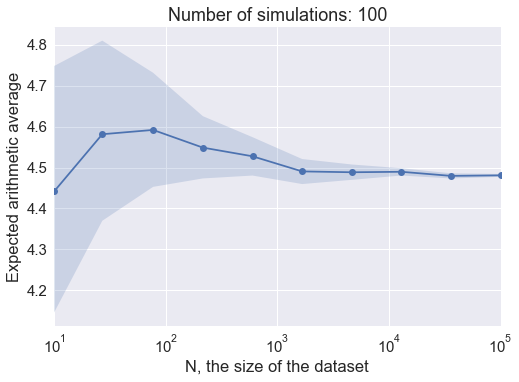

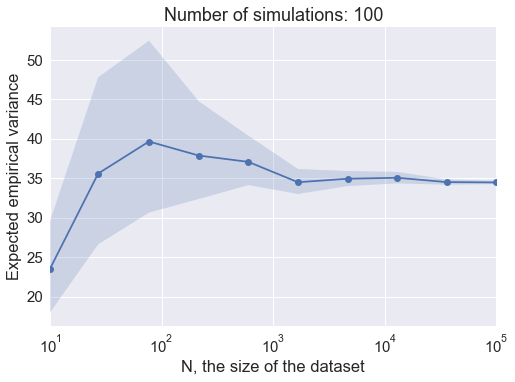

In [61]:
sim_num = 100
N = np.logspace(1, 5, num=10).astype('int')
simulations_mean = []
simulations_var = []
for i in range(sim_num):
    simulations = [cdf_inverse_sampling_lognormal(mu = 1, variance = 1, size = n) for n in N]
    simulations_mean.append([np.mean(x) for x in simulations])
    simulations_var.append([np.var(x) for x in simulations])
    
simulations_mean = np.asarray(simulations_mean)
expected_mean = simulations_mean.mean(axis=0)
simulations_var = np.asarray(simulations_var)
expected_var = simulations_var.mean(axis=0)


plt.figure()
ax = sns.tsplot(data=simulations_mean, time=N, ci=95)
ax.plot(N, expected_mean, 'o')
ax.set(xscale="log")
ax.set_xlabel('N, the size of the dataset')
ax.set_ylabel('Expected arithmetic average')
ax.set_title('Number of simulations: ' + str(sim_num))
plt.show()

plt.figure()
ax = sns.tsplot(data=simulations_var, time=N, ci=95)
ax.plot(N, expected_var, 'o')
ax.set(xscale="log")
ax.set_xlabel('N, the size of the dataset')
ax.set_ylabel('Expected empirical variance')
ax.set_title('Number of simulations: ' + str(sim_num))
plt.show()

### Case 2. log-normal: mu = 1, variance = 3, size = [10 - 100,000]

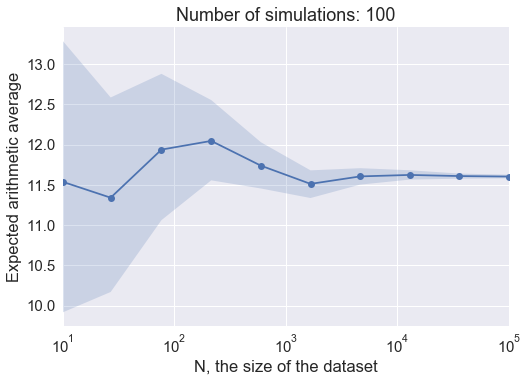

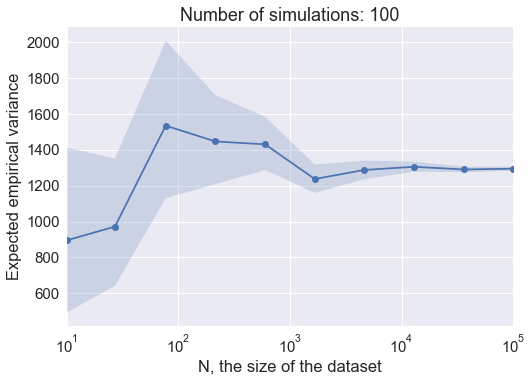

In [62]:
sim_num = 100
N = np.logspace(1, 5, num=10).astype('int')
simulations_mean = []
simulations_var = []
for i in range(sim_num):
    simulations = [cdf_inverse_sampling_lognormal(mu = 1, variance = 3, size = n) for n in N]
    simulations_mean.append([np.mean(x) for x in simulations])
    simulations_var.append([np.var(x) for x in simulations])
    
simulations_mean = np.asarray(simulations_mean)
expected_mean = simulations_mean.mean(axis=0)
simulations_var = np.asarray(simulations_var)
expected_var = simulations_var.mean(axis=0)


plt.figure()
ax = sns.tsplot(data=simulations_mean, time=N, ci=95)
ax.plot(N, expected_mean, 'o')
ax.set(xscale="log")
ax.set_xlabel('N, the size of the dataset')
ax.set_ylabel('Expected arithmetic average')
ax.set_title('Number of simulations: ' + str(sim_num))
plt.show()

plt.figure()
ax = sns.tsplot(data=simulations_var, time=N, ci=95)
ax.plot(N, expected_var, 'o')
ax.set(xscale="log")
ax.set_xlabel('N, the size of the dataset')
ax.set_ylabel('Expected empirical variance')
ax.set_title('Number of simulations: ' + str(sim_num))
plt.show()

### Case 3. log-hyperbolic: alpha=2, phi = 1, mu = 1, delta = 1, size = [10 - 100,000]

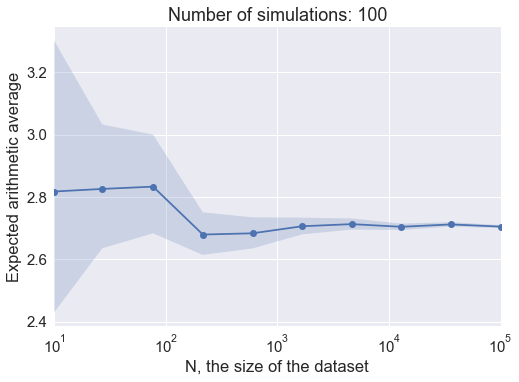

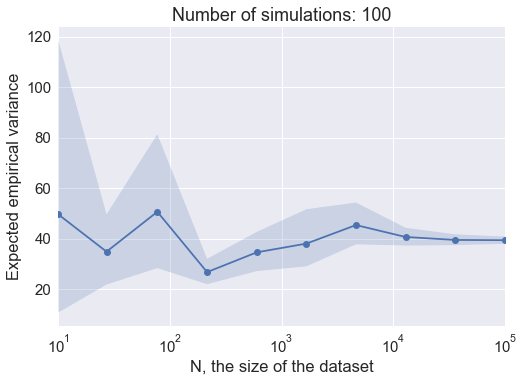

In [5]:
sim_num = 100
N = np.logspace(1, 5, num=10).astype('int')
simulations_mean = []
simulations_var = []
for i in range(sim_num):
    simulations = [cdf_inverse_sampling_loghyperbolic(alpha=2, phi=1, mu=1, delta=1, size=n) for n in N]
    simulations_mean.append([np.mean(x) for x in simulations])
    simulations_var.append([np.var(x) for x in simulations])
    
simulations_mean = np.asarray(simulations_mean)
expected_mean = simulations_mean.mean(axis=0)
simulations_var = np.asarray(simulations_var)
expected_var = simulations_var.mean(axis=0)


plt.figure()
ax = sns.tsplot(data=simulations_mean, time=N, ci=95)
ax.plot(N, expected_mean, 'o')
ax.set(xscale="log")
ax.set_xlabel('N, the size of the dataset')
ax.set_ylabel('Expected arithmetic average')
ax.set_title('Number of simulations: ' + str(sim_num))
plt.show()

plt.figure()
ax = sns.tsplot(data=simulations_var, time=N, ci=95)
ax.plot(N, expected_var, 'o')
ax.set(xscale="log")
ax.set_xlabel('N, the size of the dataset')
ax.set_ylabel('Expected empirical variance')
ax.set_title('Number of simulations: ' + str(sim_num))
plt.show()

### Case 4. log-hyperbolic: alpha=0.5, phi = 1, mu = 1, delta = 1, size = [10 - 100,000]

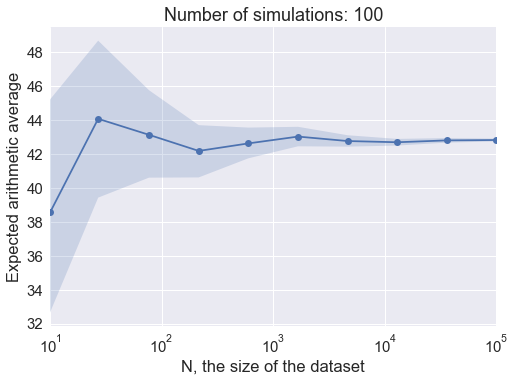

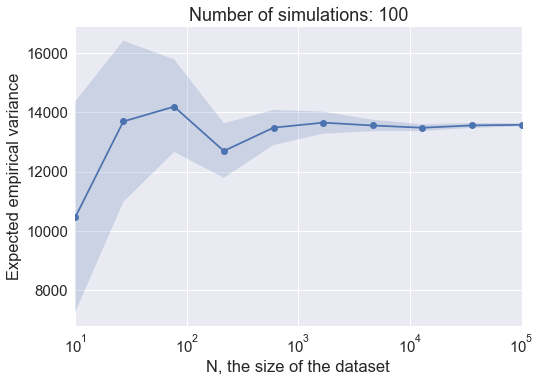

In [69]:
sim_num = 100
N = np.logspace(1, 5, num=10).astype('int')
simulations_mean = []
simulations_var = []
for i in range(sim_num):
    simulations = [cdf_inverse_sampling_loghyperbolic(alpha=0.5, phi=1, mu=1, delta=1, size=n) for n in N]
    simulations_mean.append([np.mean(x) for x in simulations])
    simulations_var.append([np.var(x) for x in simulations])
    
simulations_mean = np.asarray(simulations_mean)
expected_mean = simulations_mean.mean(axis=0)
simulations_var = np.asarray(simulations_var)
expected_var = simulations_var.mean(axis=0)


plt.figure()
ax = sns.tsplot(data=simulations_mean, time=N, ci=95)
ax.plot(N, expected_mean, 'o')
ax.set(xscale="log")
ax.set_xlabel('N, the size of the dataset')
ax.set_ylabel('Expected arithmetic average')
ax.set_title('Number of simulations: ' + str(sim_num))
plt.show()

plt.figure()
ax = sns.tsplot(data=simulations_var, time=N, ci=95)
ax.plot(N, expected_var, 'o')
ax.set(xscale="log")
ax.set_xlabel('N, the size of the dataset')
ax.set_ylabel('Expected empirical variance')
ax.set_title('Number of simulations: ' + str(sim_num))
plt.show()

### From these plots, we see that, in general, as the size of the dataset increases, the expected arithmetic average and the expected empirical variance converge on a single value and the 95% confidence interval shrinks. This can be explained by the fact that when the size of the dataset is small, the occurrence of extreme values will have an outsized effect on the arithmetic mean and variance, resulting in a larger 95% confidence interval. 

### Because of computational limitations, the number of Monte Carlo simulations was limited to 100 simulations per N, the size of the dataset. If the number of simulations were increased, I would expect that the computed expected arithmetic mean and variance to be more stable as a function of N. 